In [1]:
import pandas as pd 
import numpy as np

Month_list = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

CO_TS = []
CO_TS_LIST = []
for Month in Month_list :
    print("Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-" + Month + ".csv")
    CSV_CO_TS = pd.read_csv("ISPU-di-Provinsi-DKI-Jakarta-Bulan-" + Month + ".csv",
                               index_col=None,  
                               header=0,  
                               parse_dates=['tanggal'])
    CO_TS_LIST.append(CSV_CO_TS)
    
CO_TS = pd.concat(CO_TS_LIST, axis=0, ignore_index=True)

CO_TS.head()

Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Januari.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Februari.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Maret.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-April.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Mei.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Juni.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Juli.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Agustus.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-September.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Oktober.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-November.csv
Read ISPU-di-Provinsi-DKI-Jakarta-Bulan-Desember.csv


,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,lokasi_skpu,kategori
0,2018-01-01,76,31,38,35,9,76,PM10,SEDANG,DKI4,NaN,NaN
1,2018-01-02,23,31,24,39,14,39,O3,BAIK,DKI3,NaN,NaN
2,2018-01-03,53,35,35,101,23,101,O3,TIDAK SEHAT,DKI3,NaN,NaN
3,2018-01-04,53,49,34,57,15,57,O3,SEDANG,DKI3,NaN,NaN
4,2018-01-05,44,32,26,28,10,44,PM10,BAIK,DKI4,NaN,NaN


In [2]:
print(CO_TS[CO_TS['co'].isna()])
print(CO_TS[CO_TS['co'].isnull()])

Empty DataFrame
Columns: [tanggal, pm10, so2, co, o3, no2, max, critical, categori, lokasi_spku, lokasi_skpu, kategori]
Index: []
Empty DataFrame
Columns: [tanggal, pm10, so2, co, o3, no2, max, critical, categori, lokasi_spku, lokasi_skpu, kategori]
Index: []


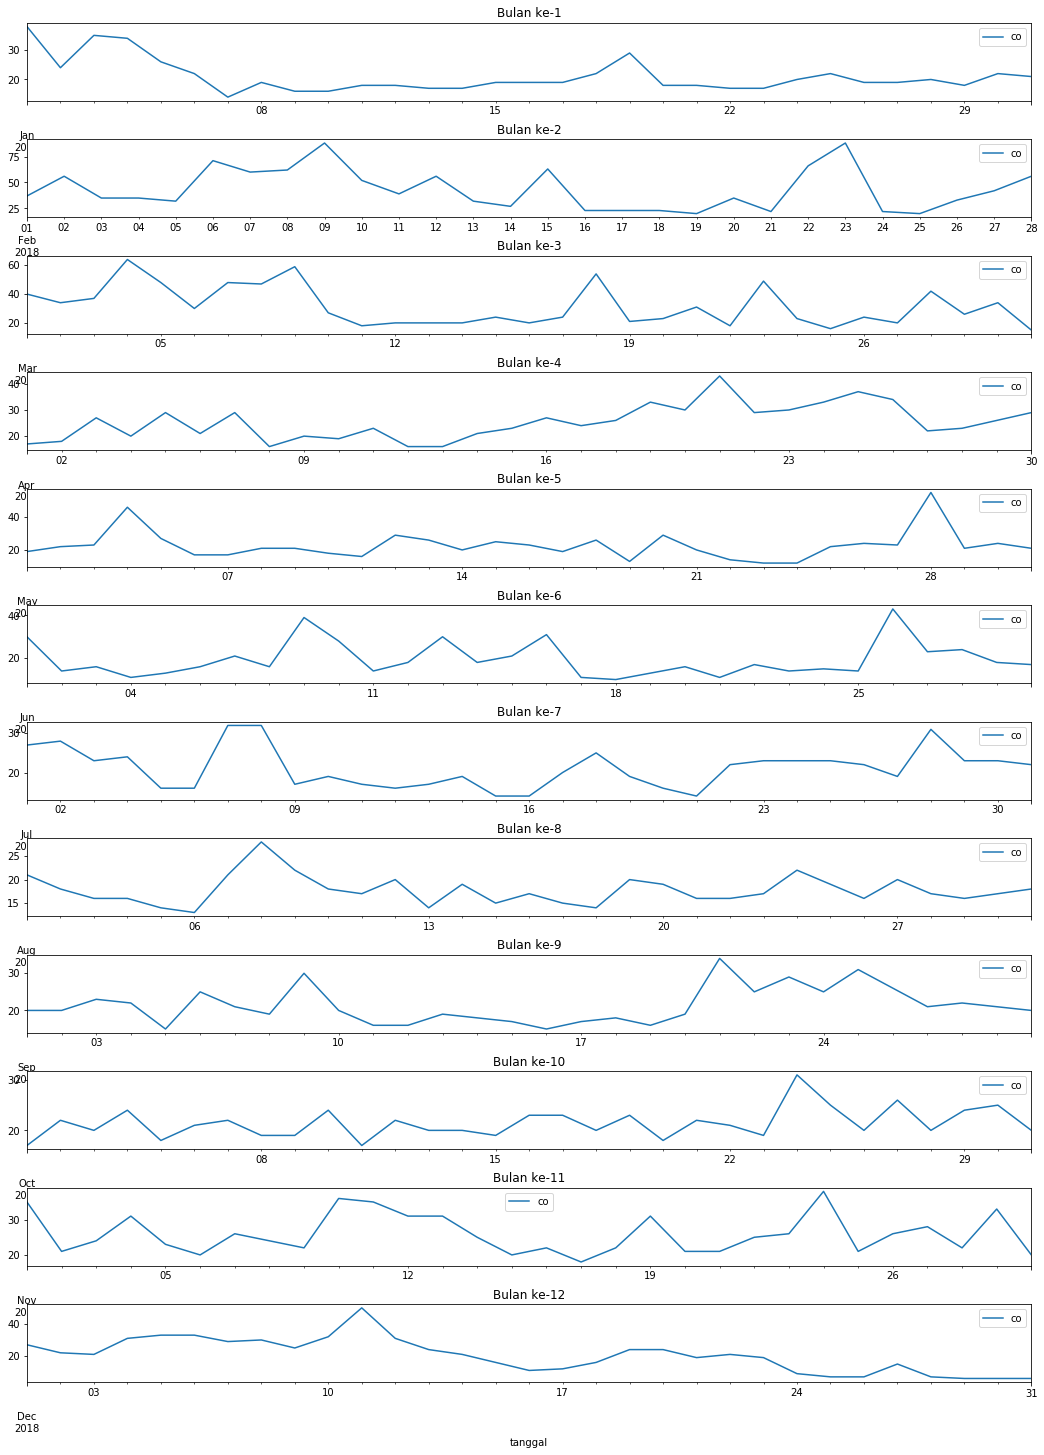

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(Month_list), ncols=1)
fig.subplots_adjust(hspace=0.5)

CO_TS = CO_TS[['tanggal', 'co']]

CO_TS.index = pd.to_datetime(CO_TS.tanggal)
CO_TS.drop(["tanggal"], axis=1, inplace=True)

for i in range(len(Month_list)):
    CO_TS.loc[CO_TS.index.month == (i+ 1), ['co']] \
                                    .plot(title='Bulan ke-' + str(i + 1) ,
                                          figsize=(18, 25),
                                          ax=axes[i])

In [138]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#input sampling timeseries
n_sampling = 5

#define param
n = n_sampling
m = n + 1
M = m
N = 1
learning_rate = 0.01
TRAIN_ITER = 2000

In [139]:
CO_TS_TRAIN = CO_TS[CO_TS.index.month < 12] #january - november time series as train data
CO_TS_TEST = CO_TS[CO_TS.index.month == 12] #december time series as test data

CO_TS_TRAIN_Arr = CO_TS_TRAIN.to_numpy()
CO_TS_TEST_Arr = CO_TS_TEST.to_numpy()


In [140]:
CO_TS_TRAIN_Arr = np.reshape(CO_TS_TRAIN_Arr, (CO_TS_TRAIN_Arr.shape[0]))
CO_TS_TEST_Arr = np.reshape(CO_TS_TEST_Arr, (CO_TS_TEST_Arr.shape[0]))

In [141]:
def split_sequence(sequence, n_steps):
	_X, _y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		_X.append(seq_x)
		_y.append(seq_y)
	return np.array(_X), np.array(_y)


In [142]:
x_train, y_train = split_sequence(CO_TS_TRAIN_Arr, n_sampling)
x_test, y_test = split_sequence(CO_TS_TEST_Arr, n_sampling)

In [143]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.callbacks import Callback

from IPython.display import clear_output

In [144]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [145]:
#define Optimizer
adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [146]:
#define Optimizer
adam = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)

# define model
model = Sequential()
model.add(Dense(m, activation='relu', input_dim=n))
model.add(Dense(M, activation='relu'))
model.add(Dense(N, activation='linear'))
model.compile(optimizer=adam, loss='mse')

In [147]:
# fit model 
model.fit(x_train, y_train, epochs=TRAIN_ITER, verbose=1)

Epoch 1/2000
329/329 [==============================] - 0s 392us/step - loss: 160.4407
Epoch 2/2000
329/329 [==============================] - 0s 57us/step - loss: 113.5518
Epoch 3/2000
329/329 [==============================] - 0s 67us/step - loss: 103.4112
Epoch 4/2000
329/329 [==============================] - 0s 70us/step - loss: 96.8294
Epoch 5/2000
329/329 [==============================] - 0s 76us/step - loss: 95.3764
Epoch 6/2000
329/329 [==============================] - 0s 70us/step - loss: 95.4825
Epoch 7/2000
329/329 [==============================] - 0s 70us/step - loss: 92.9296
Epoch 8/2000
329/329 [==============================] - 0s 67us/step - loss: 93.2686
Epoch 9/2000
329/329 [==============================] - 0s 67us/step - loss: 90.9201
Epoch 10/2000
329/329 [==============================] - 0s 67us/step - loss: 93.4528
Epoch 11/2000
329/329 [==============================] - 0s 76us/step - loss: 92.8689
Epoch 12/2000
329/329 [==============================] - 0s

329/329 [==============================] - 0s 73us/step - loss: 77.6267
Epoch 97/2000
329/329 [==============================] - 0s 73us/step - loss: 76.1585
Epoch 98/2000
329/329 [==============================] - 0s 76us/step - loss: 77.7715
Epoch 99/2000
329/329 [==============================] - 0s 58us/step - loss: 80.1754
Epoch 100/2000
329/329 [==============================] - 0s 67us/step - loss: 82.7210
Epoch 101/2000
329/329 [==============================] - 0s 64us/step - loss: 79.7519
Epoch 102/2000
329/329 [==============================] - 0s 64us/step - loss: 79.8147
Epoch 103/2000
329/329 [==============================] - 0s 76us/step - loss: 77.7893
Epoch 104/2000
329/329 [==============================] - 0s 67us/step - loss: 79.0935
Epoch 105/2000
329/329 [==============================] - 0s 70us/step - loss: 76.6330
Epoch 106/2000
329/329 [==============================] - 0s 70us/step - loss: 80.4355
Epoch 107/2000
329/329 [==============================] - 0s 

329/329 [==============================] - 0s 70us/step - loss: 76.2642
Epoch 191/2000
329/329 [==============================] - 0s 70us/step - loss: 83.4779
Epoch 192/2000
329/329 [==============================] - 0s 85us/step - loss: 76.2847
Epoch 193/2000
329/329 [==============================] - 0s 73us/step - loss: 78.0452
Epoch 194/2000
329/329 [==============================] - 0s 76us/step - loss: 75.5635
Epoch 195/2000
329/329 [==============================] - 0s 70us/step - loss: 75.2422
Epoch 196/2000
329/329 [==============================] - ETA: 0s - loss: 37.95 - 0s 67us/step - loss: 79.3700
Epoch 197/2000
329/329 [==============================] - 0s 64us/step - loss: 76.5455
Epoch 198/2000
329/329 [==============================] - 0s 67us/step - loss: 74.7028
Epoch 199/2000
329/329 [==============================] - 0s 64us/step - loss: 78.2829
Epoch 200/2000
329/329 [==============================] - 0s 70us/step - loss: 82.0151
Epoch 201/2000
329/329 [==========

329/329 [==============================] - 0s 64us/step - loss: 76.9172
Epoch 284/2000
329/329 [==============================] - 0s 67us/step - loss: 75.4982
Epoch 285/2000
329/329 [==============================] - 0s 79us/step - loss: 74.3279
Epoch 286/2000
329/329 [==============================] - 0s 61us/step - loss: 73.9615
Epoch 287/2000
329/329 [==============================] - 0s 67us/step - loss: 73.8768
Epoch 288/2000
329/329 [==============================] - 0s 67us/step - loss: 74.5056
Epoch 289/2000
329/329 [==============================] - 0s 64us/step - loss: 76.5790
Epoch 290/2000
329/329 [==============================] - 0s 67us/step - loss: 74.2449
Epoch 291/2000
329/329 [==============================] - 0s 67us/step - loss: 73.4551
Epoch 292/2000
329/329 [==============================] - 0s 64us/step - loss: 73.8208
Epoch 293/2000
329/329 [==============================] - 0s 70us/step - loss: 75.5554
Epoch 294/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 76us/step - loss: 78.4965
Epoch 378/2000
329/329 [==============================] - 0s 70us/step - loss: 74.9802
Epoch 379/2000
329/329 [==============================] - 0s 79us/step - loss: 74.5116
Epoch 380/2000
329/329 [==============================] - 0s 67us/step - loss: 74.3449
Epoch 381/2000
329/329 [==============================] - 0s 58us/step - loss: 75.2725
Epoch 382/2000
329/329 [==============================] - 0s 70us/step - loss: 74.5884
Epoch 383/2000
329/329 [==============================] - 0s 64us/step - loss: 74.2225
Epoch 384/2000
329/329 [==============================] - 0s 58us/step - loss: 75.1318
Epoch 385/2000
329/329 [==============================] - 0s 64us/step - loss: 76.1295
Epoch 386/2000
329/329 [==============================] - 0s 58us/step - loss: 76.5700
Epoch 387/2000
329/329 [==============================] - 0s 70us/step - loss: 82.4312
Epoch 388/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 64us/step - loss: 74.1102
Epoch 472/2000
329/329 [==============================] - 0s 64us/step - loss: 72.9195
Epoch 473/2000
329/329 [==============================] - 0s 70us/step - loss: 74.1591
Epoch 474/2000
329/329 [==============================] - 0s 85us/step - loss: 77.9297
Epoch 475/2000
329/329 [==============================] - 0s 64us/step - loss: 73.7733
Epoch 476/2000
329/329 [==============================] - 0s 64us/step - loss: 76.6608
Epoch 477/2000
329/329 [==============================] - 0s 64us/step - loss: 74.8783
Epoch 478/2000
329/329 [==============================] - 0s 55us/step - loss: 73.1988
Epoch 479/2000
329/329 [==============================] - 0s 58us/step - loss: 73.6826
Epoch 480/2000
329/329 [==============================] - 0s 61us/step - loss: 72.6818
Epoch 481/2000
329/329 [==============================] - 0s 70us/step - loss: 73.8496
Epoch 482/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 70us/step - loss: 77.9101
Epoch 566/2000
329/329 [==============================] - 0s 61us/step - loss: 74.7284
Epoch 567/2000
329/329 [==============================] - 0s 70us/step - loss: 72.9001
Epoch 568/2000
329/329 [==============================] - 0s 70us/step - loss: 73.6083
Epoch 569/2000
329/329 [==============================] - 0s 70us/step - loss: 74.2493
Epoch 570/2000
329/329 [==============================] - 0s 64us/step - loss: 75.4711
Epoch 571/2000
329/329 [==============================] - 0s 67us/step - loss: 78.2902
Epoch 572/2000
329/329 [==============================] - 0s 67us/step - loss: 77.6353
Epoch 573/2000
329/329 [==============================] - 0s 67us/step - loss: 74.0447
Epoch 574/2000
329/329 [==============================] - 0s 70us/step - loss: 73.7630
Epoch 575/2000
329/329 [==============================] - 0s 64us/step - loss: 74.2103
Epoch 576/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 67us/step - loss: 73.8727
Epoch 660/2000
329/329 [==============================] - 0s 70us/step - loss: 73.9288
Epoch 661/2000
329/329 [==============================] - 0s 76us/step - loss: 74.1665
Epoch 662/2000
329/329 [==============================] - 0s 73us/step - loss: 73.6785
Epoch 663/2000
329/329 [==============================] - 0s 58us/step - loss: 77.8580
Epoch 664/2000
329/329 [==============================] - 0s 64us/step - loss: 74.3112
Epoch 665/2000
329/329 [==============================] - 0s 64us/step - loss: 74.2137
Epoch 666/2000
329/329 [==============================] - 0s 64us/step - loss: 75.6881
Epoch 667/2000
329/329 [==============================] - 0s 70us/step - loss: 73.6107
Epoch 668/2000
329/329 [==============================] - 0s 118us/step - loss: 74.2570
Epoch 669/2000
329/329 [==============================] - 0s 61us/step - loss: 74.1187
Epoch 670/2000
329/329 [==============================] -

329/329 [==============================] - 0s 73us/step - loss: 72.9131
Epoch 754/2000
329/329 [==============================] - 0s 64us/step - loss: 74.4948
Epoch 755/2000
329/329 [==============================] - 0s 67us/step - loss: 74.3171
Epoch 756/2000
329/329 [==============================] - 0s 76us/step - loss: 73.5777
Epoch 757/2000
329/329 [==============================] - 0s 64us/step - loss: 74.2355
Epoch 758/2000
329/329 [==============================] - 0s 64us/step - loss: 77.9016
Epoch 759/2000
329/329 [==============================] - 0s 61us/step - loss: 75.1458
Epoch 760/2000
329/329 [==============================] - 0s 52us/step - loss: 77.6378
Epoch 761/2000
329/329 [==============================] - 0s 64us/step - loss: 80.7463
Epoch 762/2000
329/329 [==============================] - 0s 61us/step - loss: 73.4769
Epoch 763/2000
329/329 [==============================] - 0s 64us/step - loss: 73.8927
Epoch 764/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 67us/step - loss: 76.0171
Epoch 848/2000
329/329 [==============================] - 0s 70us/step - loss: 72.9817
Epoch 849/2000
329/329 [==============================] - 0s 79us/step - loss: 72.6250
Epoch 850/2000
329/329 [==============================] - 0s 61us/step - loss: 73.1105
Epoch 851/2000
329/329 [==============================] - 0s 58us/step - loss: 72.7950
Epoch 852/2000
329/329 [==============================] - 0s 61us/step - loss: 72.3260
Epoch 853/2000
329/329 [==============================] - 0s 64us/step - loss: 72.8110
Epoch 854/2000
329/329 [==============================] - 0s 58us/step - loss: 77.7268
Epoch 855/2000
329/329 [==============================] - 0s 55us/step - loss: 74.2201
Epoch 856/2000
329/329 [==============================] - 0s 76us/step - loss: 73.8511
Epoch 857/2000
329/329 [==============================] - 0s 73us/step - loss: 72.9031
Epoch 858/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 67us/step - loss: 72.8598
Epoch 942/2000
329/329 [==============================] - 0s 61us/step - loss: 74.2927
Epoch 943/2000
329/329 [==============================] - 0s 70us/step - loss: 75.3411
Epoch 944/2000
329/329 [==============================] - 0s 73us/step - loss: 74.3184
Epoch 945/2000
329/329 [==============================] - 0s 64us/step - loss: 73.8444
Epoch 946/2000
329/329 [==============================] - 0s 58us/step - loss: 78.8916
Epoch 947/2000
329/329 [==============================] - 0s 64us/step - loss: 75.4776
Epoch 948/2000
329/329 [==============================] - 0s 79us/step - loss: 74.9102
Epoch 949/2000
329/329 [==============================] - 0s 70us/step - loss: 72.2145
Epoch 950/2000
329/329 [==============================] - 0s 64us/step - loss: 73.1723
Epoch 951/2000
329/329 [==============================] - 0s 61us/step - loss: 73.4257
Epoch 952/2000
329/329 [==============================] - 

329/329 [==============================] - 0s 67us/step - loss: 74.6467
Epoch 1035/2000
329/329 [==============================] - 0s 67us/step - loss: 73.2804
Epoch 1036/2000
329/329 [==============================] - 0s 64us/step - loss: 72.9301
Epoch 1037/2000
329/329 [==============================] - 0s 73us/step - loss: 72.7986
Epoch 1038/2000
329/329 [==============================] - 0s 61us/step - loss: 74.1137
Epoch 1039/2000
329/329 [==============================] - 0s 64us/step - loss: 77.7972
Epoch 1040/2000
329/329 [==============================] - 0s 61us/step - loss: 78.2050
Epoch 1041/2000
329/329 [==============================] - 0s 70us/step - loss: 78.8897
Epoch 1042/2000
329/329 [==============================] - 0s 73us/step - loss: 75.9059
Epoch 1043/2000
329/329 [==============================] - 0s 64us/step - loss: 76.1759
Epoch 1044/2000
329/329 [==============================] - 0s 82us/step - loss: 73.7459
Epoch 1045/2000
329/329 [=======================

Epoch 1127/2000
329/329 [==============================] - 0s 67us/step - loss: 72.8131
Epoch 1128/2000
329/329 [==============================] - 0s 70us/step - loss: 72.1278
Epoch 1129/2000
329/329 [==============================] - 0s 67us/step - loss: 75.0287
Epoch 1130/2000
329/329 [==============================] - 0s 64us/step - loss: 75.5766
Epoch 1131/2000
329/329 [==============================] - 0s 58us/step - loss: 76.4774
Epoch 1132/2000
329/329 [==============================] - 0s 64us/step - loss: 72.5957
Epoch 1133/2000
329/329 [==============================] - 0s 61us/step - loss: 75.4719
Epoch 1134/2000
329/329 [==============================] - 0s 61us/step - loss: 73.4702
Epoch 1135/2000
329/329 [==============================] - 0s 55us/step - loss: 72.6881
Epoch 1136/2000
329/329 [==============================] - 0s 64us/step - loss: 74.3215
Epoch 1137/2000
329/329 [==============================] - 0s 58us/step - loss: 76.4448
Epoch 1138/2000
329/329 [=======

329/329 [==============================] - 0s 79us/step - loss: 71.1908
Epoch 1221/2000
329/329 [==============================] - 0s 67us/step - loss: 71.1720
Epoch 1222/2000
329/329 [==============================] - 0s 70us/step - loss: 72.2476
Epoch 1223/2000
329/329 [==============================] - 0s 70us/step - loss: 71.4741
Epoch 1224/2000
329/329 [==============================] - 0s 67us/step - loss: 73.7950
Epoch 1225/2000
329/329 [==============================] - 0s 82us/step - loss: 76.1092
Epoch 1226/2000
329/329 [==============================] - 0s 64us/step - loss: 77.1438
Epoch 1227/2000
329/329 [==============================] - 0s 64us/step - loss: 71.5366
Epoch 1228/2000
329/329 [==============================] - 0s 70us/step - loss: 72.1921
Epoch 1229/2000
329/329 [==============================] - 0s 73us/step - loss: 71.8764
Epoch 1230/2000
329/329 [==============================] - 0s 76us/step - loss: 73.0604
Epoch 1231/2000
329/329 [=======================

329/329 [==============================] - 0s 61us/step - loss: 72.0956
Epoch 1314/2000
329/329 [==============================] - 0s 61us/step - loss: 72.0575
Epoch 1315/2000
329/329 [==============================] - 0s 61us/step - loss: 70.2018
Epoch 1316/2000
329/329 [==============================] - 0s 67us/step - loss: 81.8359
Epoch 1317/2000
329/329 [==============================] - 0s 67us/step - loss: 74.5728
Epoch 1318/2000
329/329 [==============================] - 0s 52us/step - loss: 83.5287
Epoch 1319/2000
329/329 [==============================] - 0s 64us/step - loss: 71.2305
Epoch 1320/2000
329/329 [==============================] - 0s 64us/step - loss: 75.2827
Epoch 1321/2000
329/329 [==============================] - 0s 67us/step - loss: 70.9235
Epoch 1322/2000
329/329 [==============================] - 0s 64us/step - loss: 74.6565
Epoch 1323/2000
329/329 [==============================] - 0s 64us/step - loss: 73.2656
Epoch 1324/2000
329/329 [=======================

329/329 [==============================] - 0s 67us/step - loss: 69.1055
Epoch 1407/2000
329/329 [==============================] - 0s 70us/step - loss: 70.0722
Epoch 1408/2000
329/329 [==============================] - 0s 67us/step - loss: 72.4481
Epoch 1409/2000
329/329 [==============================] - 0s 70us/step - loss: 71.8745
Epoch 1410/2000
329/329 [==============================] - 0s 67us/step - loss: 72.4737
Epoch 1411/2000
329/329 [==============================] - 0s 58us/step - loss: 73.9361
Epoch 1412/2000
329/329 [==============================] - 0s 61us/step - loss: 73.6812
Epoch 1413/2000
329/329 [==============================] - 0s 67us/step - loss: 70.5379
Epoch 1414/2000
329/329 [==============================] - 0s 67us/step - loss: 70.5656
Epoch 1415/2000
329/329 [==============================] - 0s 67us/step - loss: 69.4368
Epoch 1416/2000
329/329 [==============================] - 0s 67us/step - loss: 69.6975
Epoch 1417/2000
329/329 [=======================

329/329 [==============================] - 0s 58us/step - loss: 71.7267
Epoch 1500/2000
329/329 [==============================] - 0s 58us/step - loss: 72.6507
Epoch 1501/2000
329/329 [==============================] - 0s 67us/step - loss: 71.7362
Epoch 1502/2000
329/329 [==============================] - 0s 64us/step - loss: 69.7609
Epoch 1503/2000
329/329 [==============================] - 0s 61us/step - loss: 69.9673
Epoch 1504/2000
329/329 [==============================] - 0s 58us/step - loss: 70.0349
Epoch 1505/2000
329/329 [==============================] - 0s 76us/step - loss: 71.4500
Epoch 1506/2000
329/329 [==============================] - 0s 61us/step - loss: 70.5940
Epoch 1507/2000
329/329 [==============================] - 0s 70us/step - loss: 69.3424
Epoch 1508/2000
329/329 [==============================] - 0s 55us/step - loss: 70.1731
Epoch 1509/2000
329/329 [==============================] - 0s 70us/step - loss: 69.6909
Epoch 1510/2000
329/329 [=======================

329/329 [==============================] - 0s 67us/step - loss: 70.2980
Epoch 1593/2000
329/329 [==============================] - 0s 61us/step - loss: 70.2460
Epoch 1594/2000
329/329 [==============================] - 0s 59us/step - loss: 70.5023
Epoch 1595/2000
329/329 [==============================] - 0s 60us/step - loss: 69.2782
Epoch 1596/2000
329/329 [==============================] - 0s 61us/step - loss: 69.3424
Epoch 1597/2000
329/329 [==============================] - 0s 61us/step - loss: 71.6984
Epoch 1598/2000
329/329 [==============================] - 0s 58us/step - loss: 75.8526
Epoch 1599/2000
329/329 [==============================] - 0s 61us/step - loss: 77.4822
Epoch 1600/2000
329/329 [==============================] - 0s 58us/step - loss: 71.9397
Epoch 1601/2000
329/329 [==============================] - 0s 58us/step - loss: 70.7545
Epoch 1602/2000
329/329 [==============================] - 0s 58us/step - loss: 70.8003
Epoch 1603/2000
329/329 [=======================

329/329 [==============================] - 0s 50us/step - loss: 72.8222
Epoch 1686/2000
329/329 [==============================] - 0s 52us/step - loss: 75.8773
Epoch 1687/2000
329/329 [==============================] - 0s 55us/step - loss: 68.3846
Epoch 1688/2000
329/329 [==============================] - 0s 58us/step - loss: 73.7284
Epoch 1689/2000
329/329 [==============================] - 0s 61us/step - loss: 69.0428
Epoch 1690/2000
329/329 [==============================] - 0s 55us/step - loss: 69.1991
Epoch 1691/2000
329/329 [==============================] - 0s 46us/step - loss: 71.0143
Epoch 1692/2000
329/329 [==============================] - 0s 52us/step - loss: 70.4385
Epoch 1693/2000
329/329 [==============================] - 0s 49us/step - loss: 69.3689
Epoch 1694/2000
329/329 [==============================] - 0s 49us/step - loss: 69.5353
Epoch 1695/2000
329/329 [==============================] - 0s 49us/step - loss: 70.0897
Epoch 1696/2000
329/329 [=======================

329/329 [==============================] - 0s 64us/step - loss: 70.7319
Epoch 1779/2000
329/329 [==============================] - 0s 57us/step - loss: 75.7967
Epoch 1780/2000
329/329 [==============================] - 0s 64us/step - loss: 73.2297
Epoch 1781/2000
329/329 [==============================] - 0s 55us/step - loss: 69.3185
Epoch 1782/2000
329/329 [==============================] - 0s 52us/step - loss: 69.0762
Epoch 1783/2000
329/329 [==============================] - 0s 52us/step - loss: 69.8364
Epoch 1784/2000
329/329 [==============================] - 0s 55us/step - loss: 69.5171
Epoch 1785/2000
329/329 [==============================] - 0s 52us/step - loss: 69.6074
Epoch 1786/2000
329/329 [==============================] - 0s 52us/step - loss: 72.1310
Epoch 1787/2000
329/329 [==============================] - 0s 58us/step - loss: 72.5560
Epoch 1788/2000
329/329 [==============================] - 0s 55us/step - loss: 69.6154
Epoch 1789/2000
329/329 [=======================

329/329 [==============================] - 0s 49us/step - loss: 69.5576
Epoch 1872/2000
329/329 [==============================] - 0s 49us/step - loss: 70.4281
Epoch 1873/2000
329/329 [==============================] - 0s 49us/step - loss: 71.8346
Epoch 1874/2000
329/329 [==============================] - 0s 49us/step - loss: 72.1823
Epoch 1875/2000
329/329 [==============================] - 0s 48us/step - loss: 70.3871
Epoch 1876/2000
329/329 [==============================] - 0s 48us/step - loss: 69.0253
Epoch 1877/2000
329/329 [==============================] - 0s 50us/step - loss: 70.2903
Epoch 1878/2000
329/329 [==============================] - 0s 49us/step - loss: 69.4880
Epoch 1879/2000
329/329 [==============================] - 0s 56us/step - loss: 69.4100
Epoch 1880/2000
329/329 [==============================] - 0s 52us/step - loss: 69.9643
Epoch 1881/2000
329/329 [==============================] - 0s 49us/step - loss: 71.6746
Epoch 1882/2000
329/329 [=======================

329/329 [==============================] - 0s 61us/step - loss: 72.2992
Epoch 1965/2000
329/329 [==============================] - 0s 52us/step - loss: 73.6642
Epoch 1966/2000
329/329 [==============================] - 0s 55us/step - loss: 71.1797
Epoch 1967/2000
329/329 [==============================] - 0s 67us/step - loss: 70.7802
Epoch 1968/2000
329/329 [==============================] - 0s 53us/step - loss: 71.1128
Epoch 1969/2000
329/329 [==============================] - 0s 55us/step - loss: 70.7894
Epoch 1970/2000
329/329 [==============================] - 0s 52us/step - loss: 71.3321
Epoch 1971/2000
329/329 [==============================] - 0s 52us/step - loss: 69.4794
Epoch 1972/2000
329/329 [==============================] - 0s 52us/step - loss: 70.2169
Epoch 1973/2000
329/329 [==============================] - 0s 66us/step - loss: 70.0086
Epoch 1974/2000
329/329 [==============================] - 0s 64us/step - loss: 69.3117
Epoch 1975/2000
329/329 [=======================

In [148]:
# demonstrate prediction
y_prediction = model.predict(x_test, verbose=0)

y_prediction = np.reshape(y_prediction, (y_prediction.shape[0]))

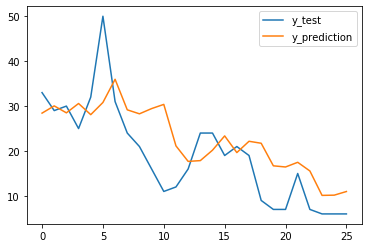

In [154]:
t = CO_TS[CO_TS.index.month == 12].index.to_numpy()
t = t[n_sampling:]

y_PD =  pd.DataFrame(data={'t':t, 'y_test':y_test},   
              index=t,    
              columns=['t', 'y_test'])  

y_prediction_PD = pd.DataFrame(data={'t':t, 'y_prediction':y_prediction},   
              index=t,    
              columns=['t', 'y_prediction']) 

Final_PD = pd.merge(y_PD, y_prediction_PD, on='t', how='left')

Final_PD[['y_test','y_prediction']].plot()